<a href="https://colab.research.google.com/github/GuJaco/Aula01CienciadeDados/blob/main/Atv_semana_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise estatística descritiva do conjunto de dados de preços de casas

Neste caderno veremos como realizar algumas análises de estatística descritiva
baseada em um conjunto de dados de preços de venda de casas.


In [3]:
import pandas as pd

In [4]:
dados = pd.read_csv('https://raw.githubusercontent.com/ywchiu/riii/refs/heads/master/data/house-prices.csv')

In [5]:
dados

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


## Histograma

Uma das primeiras formas de analisar os dados e sua distribuição é pelo gráfico denominado `histograma`

Para isso vamos gerar o histograma dos preços das casas para analisar a distribuição.


### Análise

Pelo histograma abaixo vemos que a maioria das casas de concentra entre os valores de 100.000 a 160.000 dólares aproximadamente. Não há nenhum preço de casa muito discrepante, sendo o menor por volta de US\$ 80.000 e o maior preço em torno de US\$ 200.000. A maior parte das casas foi vendida por valores em torno de US\$ 120.000.

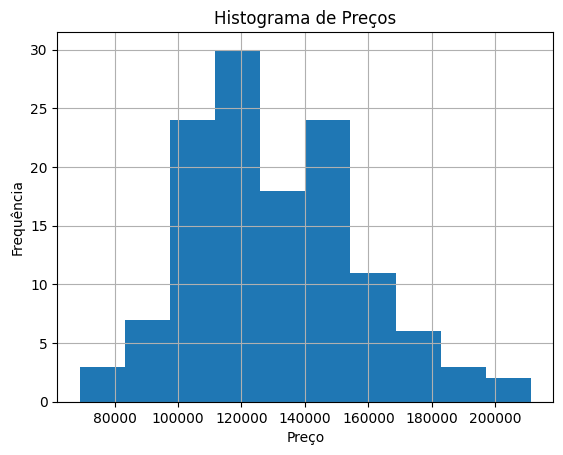

In [6]:
from matplotlib import pyplot as plt

dados['Price'].hist()

plt.title('Histograma de Preços')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

Bin edges:
[ 69100.  83310.  97520. 111730. 125940. 140150. 154360. 168570. 182780.
 196990. 211200.]


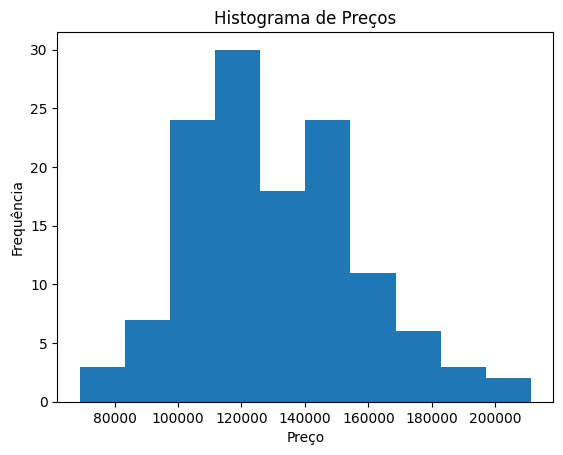

In [ ]:
# prompt: Get histogram bins

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot as plt

dados = pd.read_csv('https://raw.githubusercontent.com/ywchiu/riii/refs/heads/master/data/house-prices.csv')

# Calculate the histogram bins
n, bins, patches = plt.hist(dados['Price'], bins='auto') #'auto' or specify number of bins

# Print the bin edges
print("Bin edges:")
print(bins)

plt.title('Histograma de Preços')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()


### Histograma com média, mediana e moda

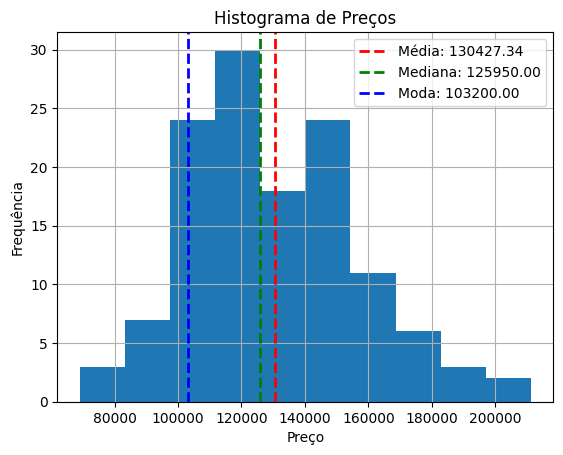

In [ ]:
# prompt: Add mean, median and mode to the plot

import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

# Calculate mean, median, and mode
mean_price = np.mean(dados['Price'])
median_price = np.median(dados['Price'])
mode_price = dados['Price'].mode()[0]  # Get the first mode if multiple exist

# Calculate the histogram bins
dados['Price'].hist()

# Add mean, median, and mode lines to the plot
plt.axvline(mean_price, color='r', linestyle='dashed', linewidth=2, label=f'Média: {mean_price:.2f}')
plt.axvline(median_price, color='g', linestyle='dashed', linewidth=2, label=f'Mediana: {median_price:.2f}')
plt.axvline(mode_price, color='b', linestyle='dashed', linewidth=2, label=f'Moda: {mode_price:.2f}')

# Set plot labels and title
plt.title('Histograma de Preços')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.legend() # Show the legend for the lines
plt.show()


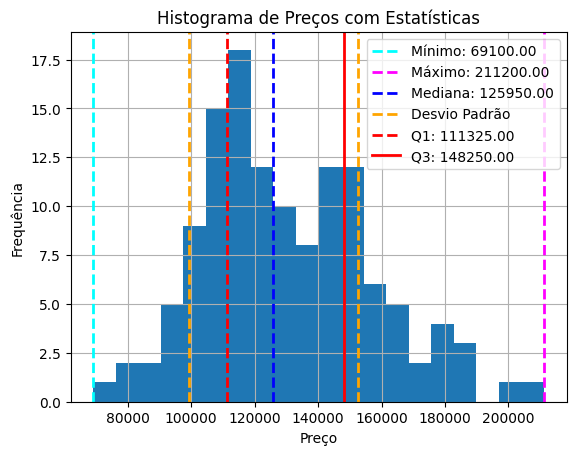

Mínimo: 69100.00
Máximo: 211200.00
Mediana: 125950.00
Desvio Padrão: 26763.61
Variância: 716290736.69


In [ ]:
# prompt: Display min, max, variance and std from mean and mean in the histogram

import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

dados = pd.read_csv('https://raw.githubusercontent.com/ywchiu/riii/refs/heads/master/data/house-prices.csv')

# Calculate statistics
min_price = np.min(dados['Price'])
max_price = np.max(dados['Price'])
mean_price = np.median(dados['Price'])
std_price = np.std(dados['Price'])
variance_price = np.var(dados['Price'])

# Calculate the histogram bins
dados['Price'].hist(bins=20)

# Add statistics lines to the plot
plt.axvline(min_price, color='cyan', linestyle='dashed', linewidth=2, label=f'Mínimo: {min_price:.2f}')
plt.axvline(max_price, color='magenta', linestyle='dashed', linewidth=2, label=f'Máximo: {max_price:.2f}')
plt.axvline(mean_price, color='blue', linestyle='dashed', linewidth=2, label=f'Mediana: {mean_price:.2f}')
plt.axvline(mean_price + std_price, color='orange', linestyle='dashed', linewidth=2, label=f'Desvio Padrão')
plt.axvline(mean_price - std_price, color='orange', linestyle='dashed', linewidth=2)

# Add Q1 and Q3
q1 = np.percentile(dados['Price'], 25)
q3 = np.percentile(dados['Price'], 75)
plt.axvline(q1, color='red', linestyle='dashed', linewidth=2, label=f'Q1: {q1:.2f}')
plt.axvline(q3, color='red', linestyle='-', linewidth=2, label=f'Q3: {q3:.2f}')


# Set plot labels and title
plt.title('Histograma de Preços com Estatísticas')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.legend() # Show the legend for the lines
plt.show()

print(f"Mínimo: {min_price:.2f}")
print(f"Máximo: {max_price:.2f}")
print(f"Mediana: {mean_price:.2f}")
print(f"Desvio Padrão: {std_price:.2f}")
print(f"Variância: {variance_price:.2f}")


## Boxplot

Outra forma muito interessante de analisar é por meio dos boxplots. Esse é um dos gráficos mais utilizados em artigos científicos e, assim como o histograma,
mostra a distribuição dos dados de uma forma mais resumida.

A grande vantagem do boxplot em relação ao histograma é a possibilidade de comparação de distribuições entre mais de uma classe como vemos no segundo gráfico abaixo.

O `boxplot`, também chamado de gráfico de caixas mostra onde 50% ou metade dos dados se encontram, a linha horizonal dentro da caixa
mostra a mediana, enquanto que as linhas que se projetam para fora das caixas representam o máximo e mínimo descontando os dados extremos (**outliers**). O gráfico de caixas considera como dado extremo se ele estiver acima ou abaixo uma caixa e meia da linha central ou:

$ dado_{extremoInferior} = Q1  - 1.5 \cdot IQR $
$ dado_{extremoSuperior} = Q3  + 1.5 \cdot IQR $

$ IQR = Q3 - Q1 $

 - IQR: Intervalo interquartil
 - Q3: 75% dos dados
 - Q1: 25% dos dados

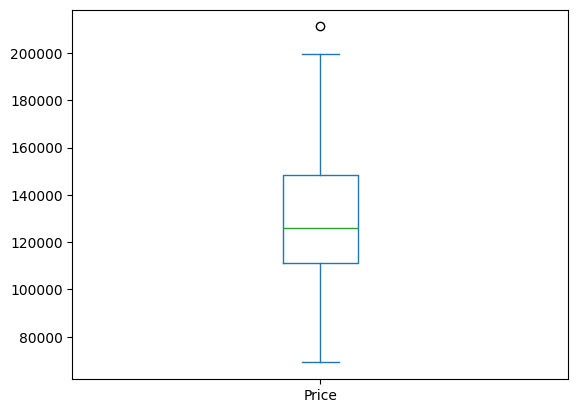

In [ ]:
# Boxplot
dados['Price'].plot(kind='box')
plt.show()

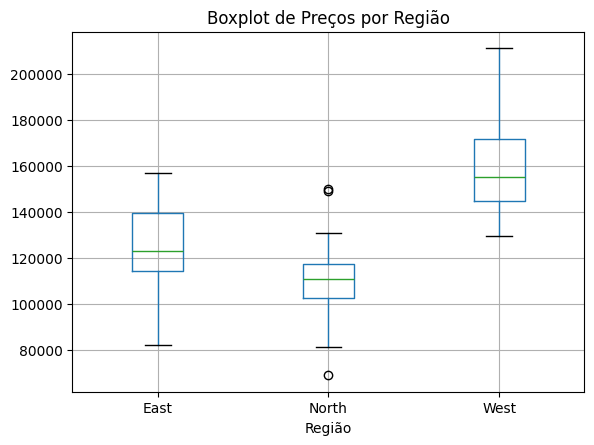

In [ ]:
#Boxplot by neighborhood
ax = dados.boxplot(column='Price', by='Neighborhood')
plt.xlabel('Região')
plt.suptitle('')
plt.title('Boxplot de Preços por Região')
plt.show()

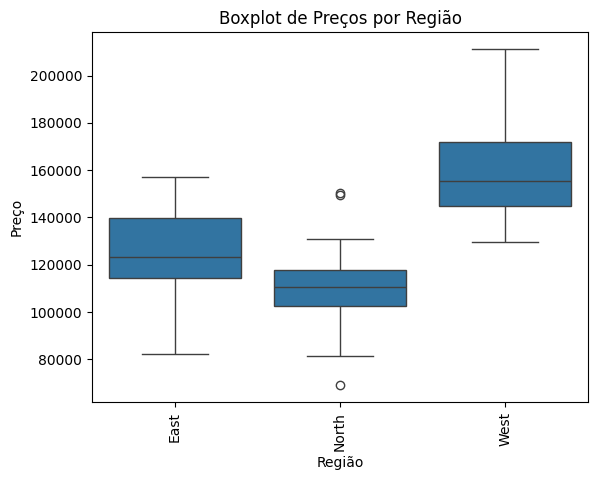

In [ ]:
import seaborn as sns

sns.boxplot(x='Neighborhood', y='Price', data=dados)
plt.title('Boxplot de Preços por Região')
plt.xlabel('Região')
plt.ylabel('Preço')
plt.xticks(rotation=90)
plt.show()

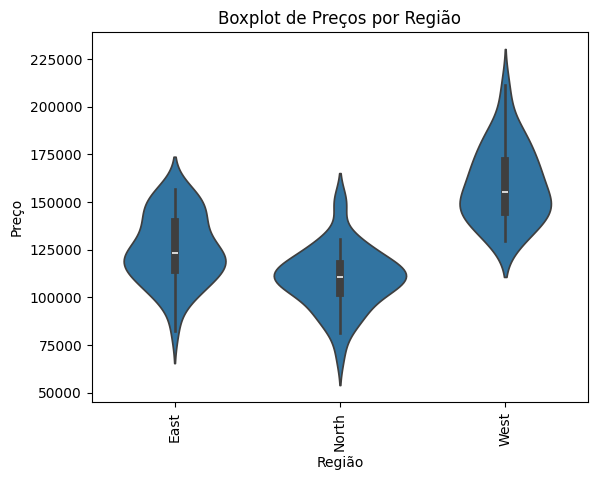

In [ ]:
import seaborn as sns

sns.violinplot(x='Neighborhood', y='Price', data=dados)
plt.title('Boxplot de Preços por Região')
plt.xlabel('Região')
plt.ylabel('Preço')
plt.xticks(rotation=90)
plt.show()

<h1 style="color: yellow">
O que podemos concluir ao analisar o boxplot acima?
</h1>

## Gráfico de barras ou colunas

Outra maneira de representar essa informação de maneira resumida seria utilizar o gráfico de colunas, no entanto perdemos bastante informação ao utilizar esse tipo de gráfico, pois não sabemos como, de fato, os dados se distribuem.

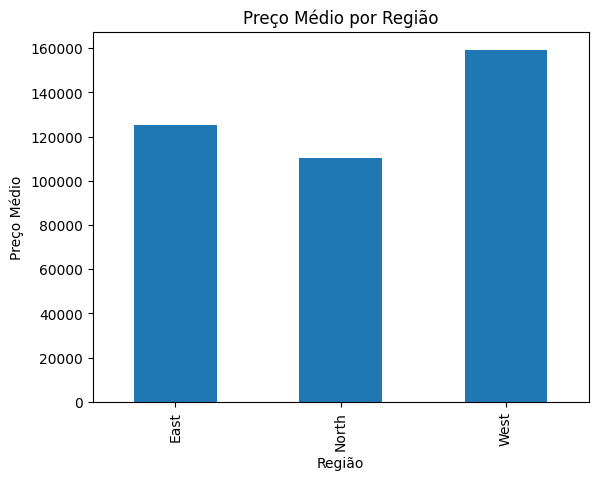

In [ ]:
dados.groupby('Neighborhood')['Price'].mean().plot(kind='bar')
plt.title('Preço Médio por Região')
plt.xlabel('Região')
plt.ylabel('Preço Médio')
plt.show()

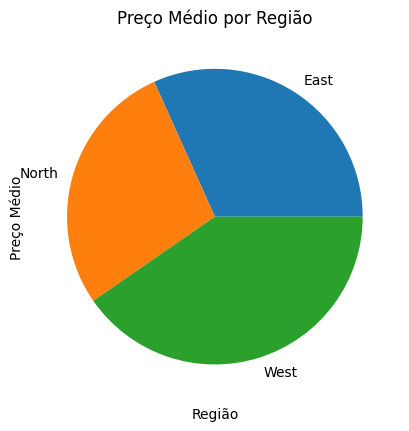

In [ ]:
dados.groupby('Neighborhood')['Price'].mean().plot(kind='pie')
plt.title('Preço Médio por Região')
plt.xlabel('Região')
plt.ylabel('Preço Médio')
plt.show()

# E aí, qual gráfico permite entender melhor os dados, esse gráfico de barras ou os boxplot, por que?

## Percentis

Os percentis são calculados organizando os dados em ordem crescente e dividindo o intervalo de dados em 100 partes. Por exemplo, o percentil 25% é o valor em qual está posicionado o 1/4 dos dados ordenados.

O histograma abaixo mostra os percentis de 10 em 10%.

Percentis:
0%: 69100.00
10%: 102020.00
20%: 107780.00
30%: 114330.00
40%: 117800.00
50%: 125950.00
60%: 134200.00
70%: 145430.00
80%: 151780.00
90%: 166560.00
100%: 211200.00


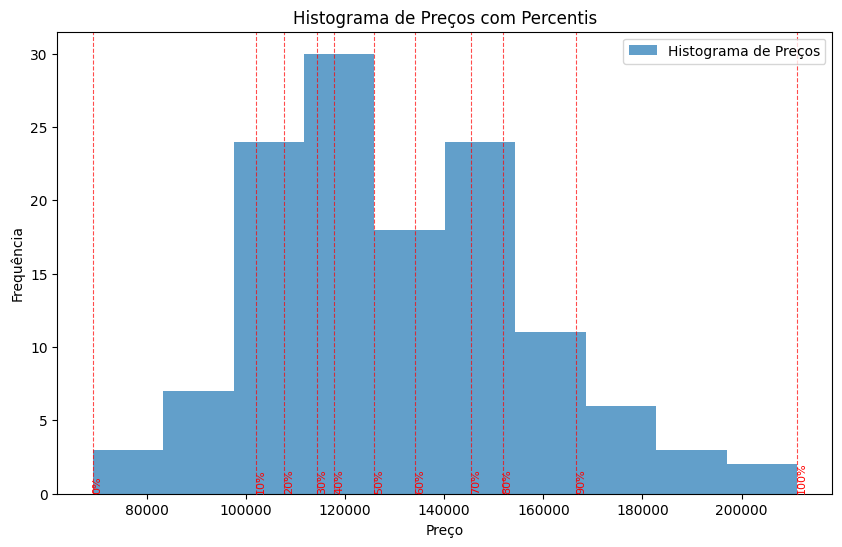

In [ ]:
# prompt: Display histogram and percentiles each 10

import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
dados = pd.read_csv('https://raw.githubusercontent.com/ywchiu/riii/refs/heads/master/data/house-prices.csv')

# Calculate percentiles
percentiles = [i for i in range(0, 101, 10)]  # Percentiles from 0 to 100 in steps of 10
percentile_values = np.percentile(dados['Price'], percentiles)

# Create the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
n, bins, patches = plt.hist(dados['Price'], bins='auto', alpha=0.7, label='Histograma de Preços')
plt.title('Histograma de Preços com Percentis')
plt.xlabel('Preço')
plt.ylabel('Frequência')

# Add percentile lines to the histogram
for p, val in zip(percentiles, percentile_values):
    plt.axvline(val, color='red', linestyle='dashed', linewidth=0.8, alpha=0.7)
    plt.text(val, 0, f'{p}%', rotation=90, verticalalignment='bottom', fontsize=8, color='red')


# Display the percentiles in a more readable format
print("Percentis:")
for p, val in zip(percentiles, percentile_values):
    print(f"{p}%: {val:.2f}")

plt.legend()
plt.show()


## Analisando a correlação entre dois dados numéricos de uma vez

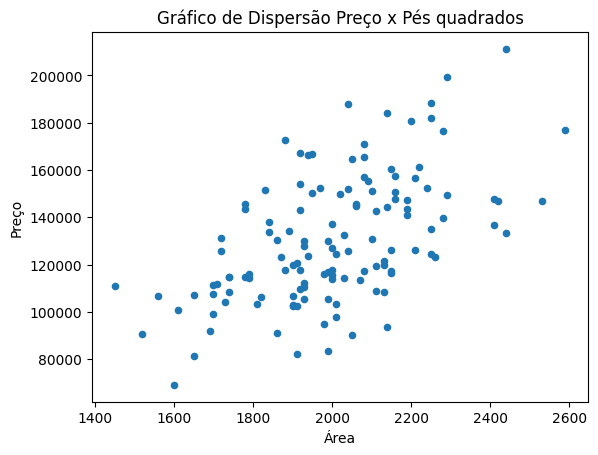

In [ ]:
dados.plot(kind='scatter', x='SqFt', y='Price')
plt.ylabel('Preço')
plt.xlabel('Área')
plt.title('Gráfico de Dispersão Preço x Pés quadrados')
plt.show()

# O que podemos concluir do gráfico de dispersão acima?

## Usando o seaborn

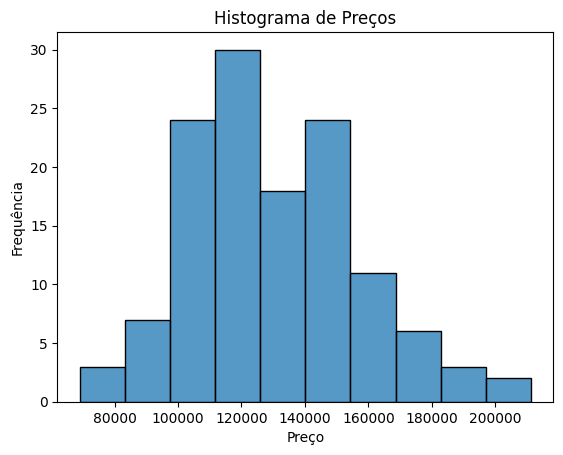

In [ ]:
# Histograma com seaborn

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(dados['Price'], bins='auto')
plt.title('Histograma de Preços')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

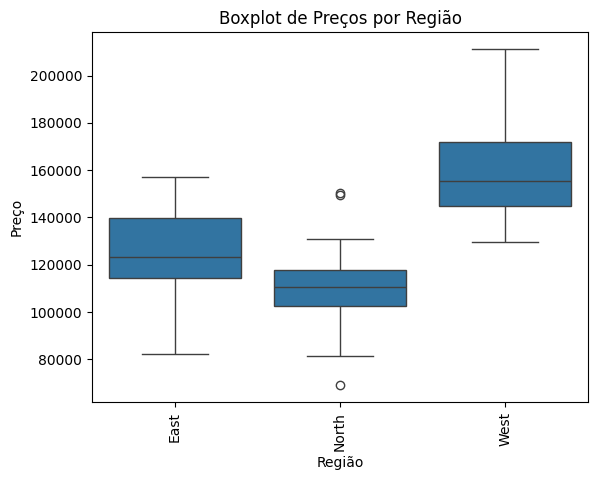

In [ ]:
# Boxplot por região

sns.boxplot(x='Neighborhood', y='Price', data=dados)
plt.title('Boxplot de Preços por Região')
plt.xlabel('Região')
plt.ylabel('Preço')
plt.xticks(rotation=90)
plt.show()

## Além do boxplot, o seaborn permite fazermos o `violinplot` ou gráfico de violino, que demonstra a distribuição de forma parecida ao histograma

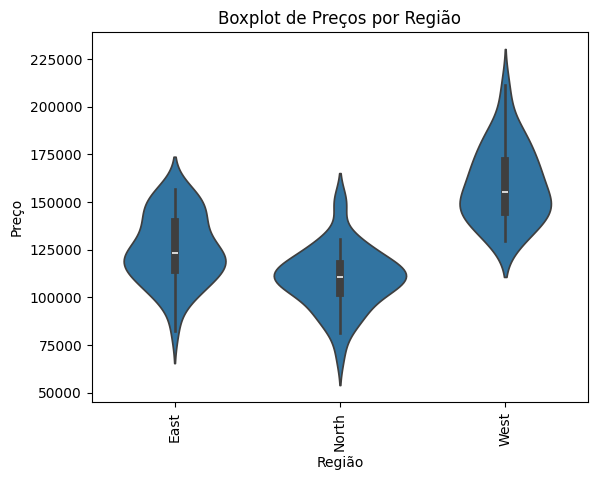

In [ ]:
# Gráfico violino

sns.violinplot(x='Neighborhood', y='Price', data=dados)
plt.title('Boxplot de Preços por Região')
plt.xlabel('Região')
plt.ylabel('Preço')
plt.xticks(rotation=90)
plt.show()

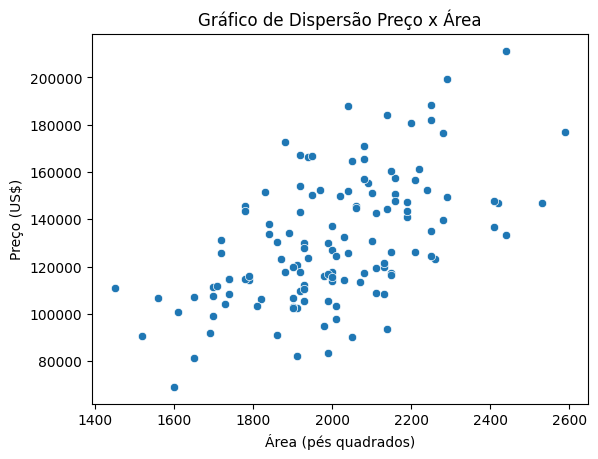

In [ ]:
# Dispersão Preço por Area

sns.scatterplot(x='SqFt', y='Price', data=dados)
plt.title('Gráfico de Dispersão Preço x Área')
plt.xlabel('Área (pés quadrados)')
plt.ylabel('Preço (US$)')
plt.show()

# Agora analise as outras variáveis como o número de quartos e número de banheiros em relação ao preço das casas

Será que as outras variáveis afetam os preços das casas?

**Analise Quantidade Banheiros x Preço**

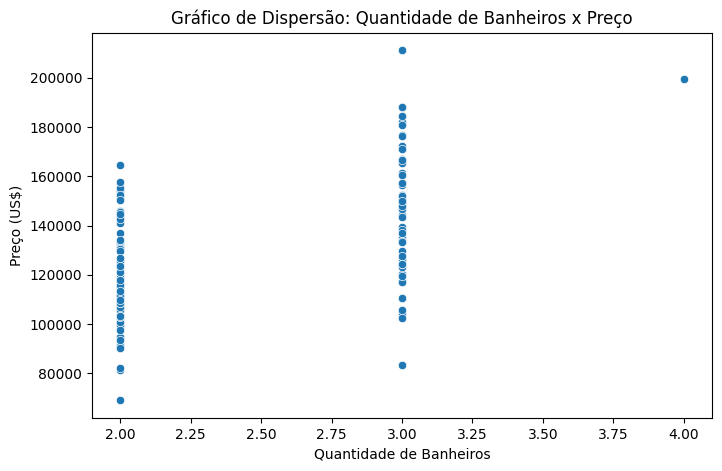

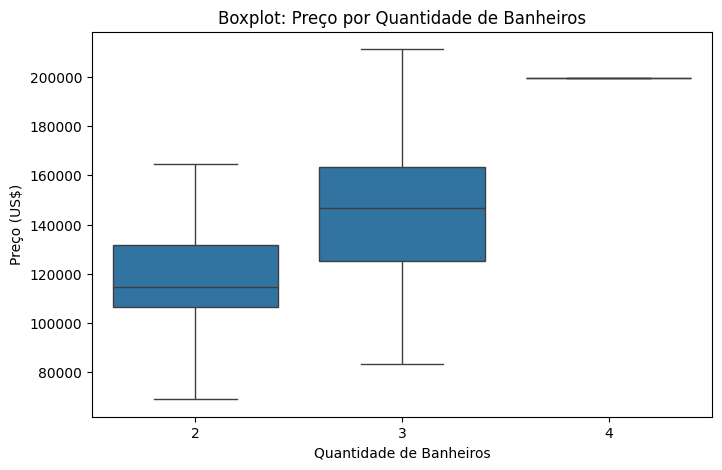

In [9]:

# Gráfico de dispersão
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Bathrooms', y='Price', data=dados)
plt.title('Gráfico de Dispersão: Quantidade de Banheiros x Preço')
plt.xlabel('Quantidade de Banheiros')
plt.ylabel('Preço (US$)')
plt.show()

# Boxplot para ver a distribuição dos preços por quantidade de banheiros
plt.figure(figsize=(8, 5))
sns.boxplot(x='Bathrooms', y='Price', data=dados)
plt.title('Boxplot: Preço por Quantidade de Banheiros')
plt.xlabel('Quantidade de Banheiros')
plt.ylabel('Preço (US$)')
plt.show()


**Analise quantidade quartos x preço**

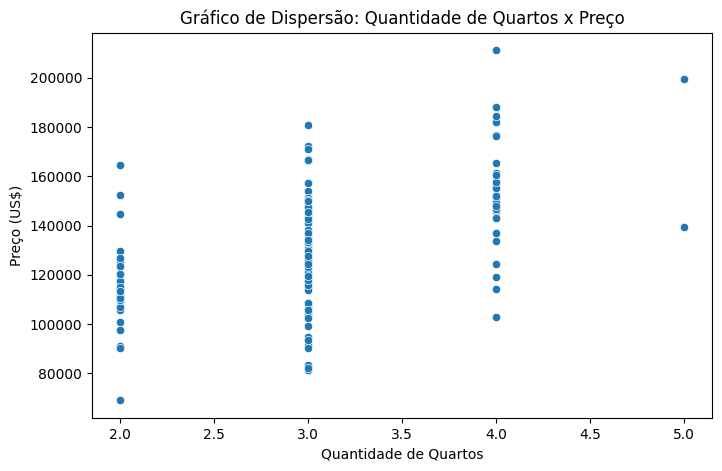

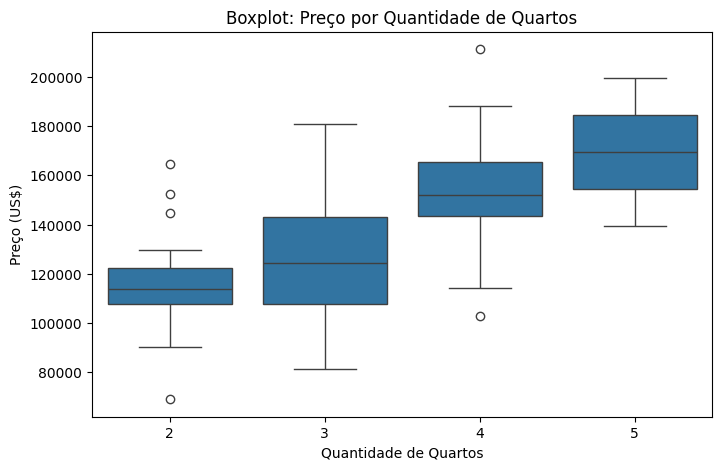

In [10]:
# Gráfico de dispersão
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Bedrooms', y='Price', data=dados)
plt.title('Gráfico de Dispersão: Quantidade de Quartos x Preço')
plt.xlabel('Quantidade de Quartos')
plt.ylabel('Preço (US$)')
plt.show()

# Boxplot para ver a distribuição dos preços por quantidade de quartos
plt.figure(figsize=(8, 5))
sns.boxplot(x='Bedrooms', y='Price', data=dados)
plt.title('Boxplot: Preço por Quantidade de Quartos')
plt.xlabel('Quantidade de Quartos')
plt.ylabel('Preço (US$)')
plt.show()
